In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import detrend, lombscargle
from statsmodels.nonparametric.smoothers_lowess import lowess

In [4]:
def perform_spectral_analysis(y, x_values):
    # remove trend and apply window function
    y_detrended = detrend(y)
    N = len(y)
    window = np.hanning(N)
    y_windowed = y_detrended * window
    
    # calculate sampling interval
    dt = np.mean(np.diff(x_values))
    #print("采样率 =", 1/dt, "Hz")
    
    # Lomb-Scargle analysis
    freqs = np.linspace(0.01,900, N//2)  # limit to Nyquist frequency
    angular_freqs = 2 * np.pi * freqs
    pgram = lombscargle(x_values, y_windowed, angular_freqs)
    amp_ls = np.sqrt(4 * pgram / (N * np.sum(window**2)/N))
    return freqs, amp_ls

def extract_peak_intensity(file_name, target_freq, freq_tolerance=0.5):
    """
    extract peak intensity near specific frequency, using the combined value of three axes of acceleration
    """
    print('target_freq:', target_freq)
    # read data
    df = pd.read_csv(file_name)
    x = df.iloc[50:, 0].values * 0.000001
    
    # read acceleration data of three directions
    ax = df.iloc[50:, 1].values  # X direction
    ay = df.iloc[50:, 2].values  # Y direction
    az = df.iloc[50:, 3].values  # Z direction
    
    # calculate combined acceleration
    a_total = np.sqrt(ax**2 + ay**2 + az**2)
    
    # calculate mean and normalize
    a_mean = np.mean(a_total)
    a_normalized = np.abs(a_total - a_mean)
    
    # perform Lomb-Scargle analysis
    freqs_ls, amp_ls = perform_spectral_analysis(a_normalized, x)
    
    # find the maximum peak in the target frequency range
    mask = (freqs_ls >= target_freq - freq_tolerance) & (freqs_ls <= target_freq + freq_tolerance)
    peak_idx = np.argmax(amp_ls[mask])
    peak_freq = freqs_ls[mask][peak_idx]
    peak_amp = amp_ls[mask][peak_idx]
    
    return peak_freq, peak_amp

def analyze_frequency_response():
    # test frequency list
    test_freqs = [ 40, 50, 60, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 450, 470, 490, 510, 530, 550, 570, 590, 600, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 800, 810, 830, 840, 850]  # Hz
    
    # corresponding file list, if you need data please email the author
    files = [
        r'SD_Test2\SD_40HZ.TXT',
        r'SD_Test2\SD_50HZ.TXT',
        r'SD_Test2\SD_60HZ.TXT',
        r'SD_Test2\SD_80HZ.TXT',
        r'SD_Test2\SD_85HZ.TXT',
        r'SD_Test2\SD_90HZ.TXT',
        r'SD_Test2\SD_95HZ.TXT',
        r'SD_Test2\SD_100HZ.TXT',
        r'SD_Test2\SD_105HZ.TXT',
        r'SD_Test2\SD_110HZ.TXT',
        r'SD_Test2\SD_115HZ.TXT',
        r'SD_Test2\SD_120HZ.TXT',
        r'SD_Test2\SD_125HZ.TXT',
        r'SD_Test2\SD_130HZ.TXT',
        r'SD_Test2\SD_135HZ.TXT',
        r'SD_Test2\SD_140HZ.TXT',
        r'SD_Test2\SD_150HZ.TXT',
        r'SD_Test2\SD_160HZ.TXT',
        r'SD_Test2\SD_170HZ.TXT',
        r'SD_Test2\SD_180HZ.TXT',
        r'SD_Test2\SD_190HZ.TXT',
        r'SD_Test2\SD_200HZ.TXT',
        r'SD_Test2\SD_210HZ.TXT',
        r'SD_Test2\SD_220HZ.TXT',
        r'SD_Test2\SD_230HZ.TXT',
        r'SD_Test2\SD_240HZ.TXT',
        r'SD_Test2\SD_250HZ.TXT',
        r'SD_Test2\SD_260HZ.TXT',
        r'SD_Test2\SD_270HZ.TXT',
        r'SD_Test2\SD_280HZ.TXT',
        r'SD_Test2\SD_290HZ.TXT',
        r'SD_Test2\SD_300HZ.TXT',
        r'SD_Test2\SD_310HZ.TXT',
        r'SD_Test2\SD_320HZ.TXT',
        r'SD_Test2\SD_330HZ.TXT',
        r'SD_Test2\SD_340HZ.TXT',
        r'SD_Test2\SD_350HZ.TXT',
        r'SD_Test2\SD_360HZ.TXT',
        r'SD_Test2\SD_370HZ.TXT',
        r'SD_Test2\SD_380HZ.TXT',
        r'SD_Test2\SD_390HZ.TXT',
        r'SD_Test2\SD_400HZ.TXT',
        r'SD_Test2\SD_410HZ.TXT',
        r'SD_Test2\SD_420HZ.TXT',
        r'SD_Test2\SD_430HZ.TXT',
        r'SD_Test2\SD_450HZ.TXT',
        r'SD_Test2\SD_470HZ.TXT',
        r'SD_Test2\SD_490HZ.TXT',
        r'SD_Test2\SD_510HZ.TXT',
        r'SD_Test2\SD_530HZ.TXT',  
        r'SD_Test2\SD_550HZ.TXT',
        r'SD_Test2\SD_570HZ.TXT',
        r'SD_Test2\SD_590HZ.TXT',
        r'SD_Test2\SD_600HZ.TXT',
        r'SD_Test2\SD_610HZ.TXT',
        r'SD_Test2\SD_630HZ.TXT',
        r'SD_Test2\SD_650HZ.TXT',
        r'SD_Test2\SD_670HZ.TXT',
        r'SD_Test2\SD_690HZ.TXT',
        r'SD_Test2\SD_710HZ.TXT',
        r'SD_Test2\SD_730HZ.TXT',
        r'SD_Test2\SD_750HZ.TXT',
        r'SD_Test2\SD_770HZ.TXT',
        r'SD_Test2\SD_790HZ.TXT',
        r'SD_Test2\SD_800HZ.TXT',
        r'SD_Test2\SD_810HZ.TXT',
        r'SD_Test2\SD_830HZ.TXT',
        r'SD_Test2\SD_840HZ.TXT',
        r'SD_Test2\SD_850HZ.TXT',
        # ... 添加其他文件
    ]
    
    # store results
    results = []
    
    # analyze each file
    for freq, file in zip(test_freqs, files):
        peak_freq, peak_amp = extract_peak_intensity(file, freq)
        results.append({
            'target_freq': freq,
            'measured_freq': peak_freq,
            'amplitude': peak_amp
        })
    
    # convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # normalize amplitude
    #max_amp = results_df['amplitude'].max()
    #results_df['normalized_amplitude'] = results_df['amplitude'] / max_amp
    
    
    # plot frequency response curve
    plt.figure(figsize=(12, 6))
    plt.bar(results_df['target_freq'], results_df['amplitude'], 
            label='Measured points', color='blue', alpha=0.5, width=5)
    
    # add trend line
    # use polynomial fitting, degree=4 provides enough flexibility to capture the main trend
    smoothed = lowess(np.log10(results_df['amplitude']), 
                     results_df['target_freq'],
                     frac=0.2,    # 平滑参数，可调
                     it=5)        # 迭代次数
    
    # plot trend line
    plt.plot(smoothed[:, 0], 10**smoothed[:, 1], 'r-', 
             label='Trend line', linewidth=2)
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    #plt.title('Accelerometer Frequency Response')
    plt.grid(True)
    plt.legend()
    plt.yscale('log')
    plt.show()
    
    # calculate and print the response change of key frequencies
    key_freqs = [100, 300, 500, 700]
    print("\nFrequency response characteristics analysis:")
    for freq in key_freqs:
        idx = np.abs(smoothed[:, 0] - freq).argmin()
        response = 10**smoothed[idx, 1]
        print(f"{freq}Hz response amplitude: {response:.2e}")
    
    # save results
    results_df.to_csv('frequency_response.csv', index=False)
    return results_df, smoothed  # return original data and smoothed result


target_freq: 40
target_freq: 50
target_freq: 60
target_freq: 80
target_freq: 85
target_freq: 90
target_freq: 95
target_freq: 100
target_freq: 105
target_freq: 110
target_freq: 115
target_freq: 120
target_freq: 125
target_freq: 130
target_freq: 135
target_freq: 140
target_freq: 145
target_freq: 150
target_freq: 160
target_freq: 170
target_freq: 180
target_freq: 190
target_freq: 200
target_freq: 210
target_freq: 220
target_freq: 230
target_freq: 240
target_freq: 250
target_freq: 260
target_freq: 270
target_freq: 280
target_freq: 290
target_freq: 300
target_freq: 310
target_freq: 320
target_freq: 330
target_freq: 340
target_freq: 350
target_freq: 360
target_freq: 370
target_freq: 380
target_freq: 390
target_freq: 400
target_freq: 410
target_freq: 420
target_freq: 430
target_freq: 450
target_freq: 470
target_freq: 490
target_freq: 510
target_freq: 530
target_freq: 550
target_freq: 570
target_freq: 590
target_freq: 600
target_freq: 610
target_freq: 630
target_freq: 650
target_freq: 670
targ

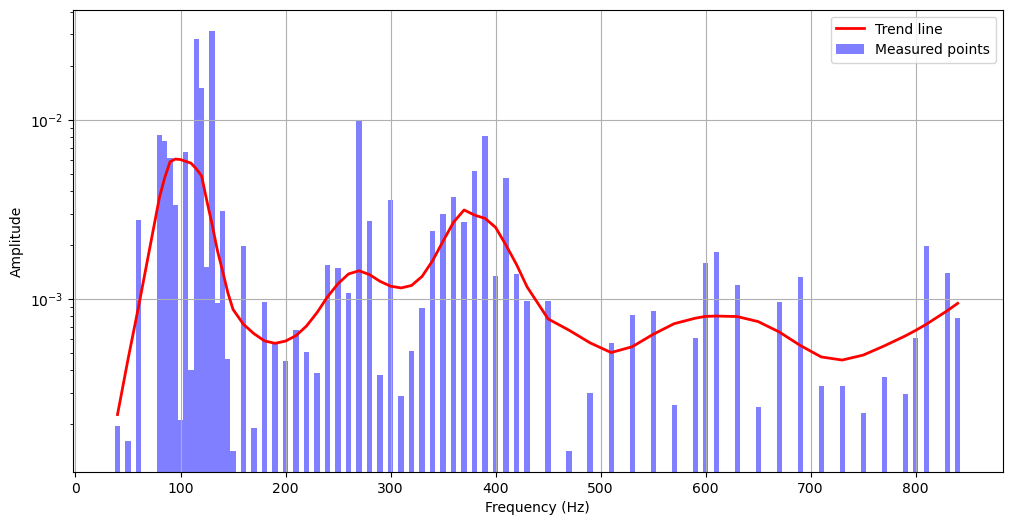


频率响应特性分析:
100Hz 处的响应幅值: 6.01e-03
300Hz 处的响应幅值: 1.18e-03
500Hz 处的响应幅值: 5.69e-04
700Hz 处的响应幅值: 5.51e-04

频率响应数据:
(    target_freq  measured_freq  amplitude
0            40      40.241341   0.000197
1            50      50.254840   0.000161
2            60      60.107854   0.002749
3            80      79.998467   0.008281
4            85      85.070030   0.007612
..          ...            ...        ...
64          790     789.882176   0.000294
65          800     799.831189   0.000606
66          810     810.001000   0.001983
67          830     829.985672   0.001402
68          840     840.418780   0.000788

[69 rows x 3 columns], array([[ 40.        ,  -3.64481948],
       [ 50.        ,  -3.33654559],
       [ 60.        ,  -3.04365402],
       [ 80.        ,  -2.43074761],
       [ 85.        ,  -2.32164782],
       [ 90.        ,  -2.23399257],
       [ 95.        ,  -2.21857432],
       [100.        ,  -2.22134755],
       [105.        ,  -2.23147784],
       [110.        ,  -2.

In [5]:
# example usage
response_data = analyze_frequency_response()
print("\nFrequency response data:")
print(response_data)

## Gaussian Filter

In [12]:
def perform_spectral_analysis(y, x_values):
    # remove trend and apply window function
    y_detrended = detrend(y)
    N = len(y)
    window = np.hanning(N)
    y_windowed = y_detrended * window
    
    # calculate sampling interval
    dt = np.mean(np.diff(x_values))
    #print("采样率 =", 1/dt, "Hz")
    
    # Lomb-Scargle analysis
    freqs = np.linspace(0.01,900, N//2)  # limit to Nyquist frequency
    angular_freqs = 2 * np.pi * freqs
    pgram = lombscargle(x_values, y_windowed, angular_freqs)
    amp_ls = np.sqrt(4 * pgram / (N * np.sum(window**2)/N))
    return freqs, amp_ls

def extract_peak_intensity(file_name, target_freq, freq_tolerance=0.5):
   
    print('target_freq:', target_freq)
 
    df = pd.read_csv(file_name)
    x = df.iloc[:, 0].values * 0.000001
    
  
    ax = df.iloc[:, 1].values  # X方向
    ay = df.iloc[:, 2].values  # Y方向
    az = df.iloc[:, 3].values  # Z方向
    

    a_total = np.sqrt(ax**2 + ay**2 + az**2)
    
    # apply Gaussian filter
    window_size = 3  
    sigma = 1      
    gaussian_kernel = np.exp(-(np.arange(-window_size//2, window_size//2+1)**2)/(2*sigma**2))
    gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)
    a_filtered = np.convolve(a_total, gaussian_kernel, mode='same')  # 改用 'same' 模式
    
    # no need to adjust time array, because 'same' mode is used
    # calculate mean and normalize
    a_mean = np.mean(a_filtered)
    a_normalized = np.abs(a_filtered - a_mean)
    
    # perform Lomb-Scargle analysis
    freqs_ls, amp_ls = perform_spectral_analysis(a_normalized, x)
    
    mask = (freqs_ls >= target_freq - freq_tolerance) & (freqs_ls <= target_freq + freq_tolerance)
    peak_idx = np.argmax(amp_ls[mask])
    peak_freq = freqs_ls[mask][peak_idx]
    peak_amp = amp_ls[mask][peak_idx]
    
    return peak_freq, peak_amp

def analyze_frequency_response():

    test_freqs = [ 40, 50, 60, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 450, 470, 490, 510, 530, 550, 570, 590, 600, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 800, 810, 830, 840, 850]  # Hz
    
    files = [
        r'SD_Test2\SD_40HZ.TXT',
        r'SD_Test2\SD_50HZ.TXT',
        r'SD_Test2\SD_60HZ.TXT',
        r'SD_Test2\SD_80HZ.TXT',
        r'SD_Test2\SD_85HZ.TXT',
        r'SD_Test2\SD_90HZ.TXT',
        r'SD_Test2\SD_95HZ.TXT',
        r'SD_Test2\SD_100HZ.TXT',
        r'SD_Test2\SD_105HZ.TXT',
        r'SD_Test2\SD_110HZ.TXT',
        r'SD_Test2\SD_115HZ.TXT',
        r'SD_Test2\SD_120HZ.TXT',
        r'SD_Test2\SD_125HZ.TXT',
        r'SD_Test2\SD_130HZ.TXT',
        r'SD_Test2\SD_135HZ.TXT',
        r'SD_Test2\SD_140HZ.TXT',
        r'SD_Test2\SD_150HZ.TXT',
        r'SD_Test2\SD_160HZ.TXT',
        r'SD_Test2\SD_170HZ.TXT',
        r'SD_Test2\SD_180HZ.TXT',
        r'SD_Test2\SD_190HZ.TXT',
        r'SD_Test2\SD_200HZ.TXT',
        r'SD_Test2\SD_210HZ.TXT',
        r'SD_Test2\SD_220HZ.TXT',
        r'SD_Test2\SD_230HZ.TXT',
        r'SD_Test2\SD_240HZ.TXT',
        r'SD_Test2\SD_250HZ.TXT',
        r'SD_Test2\SD_260HZ.TXT',
        r'SD_Test2\SD_270HZ.TXT',
        r'SD_Test2\SD_280HZ.TXT',
        r'SD_Test2\SD_290HZ.TXT',
        r'SD_Test2\SD_300HZ.TXT',
        r'SD_Test2\SD_310HZ.TXT',
        r'SD_Test2\SD_320HZ.TXT',
        r'SD_Test2\SD_330HZ.TXT',
        r'SD_Test2\SD_340HZ.TXT',
        r'SD_Test2\SD_350HZ.TXT',
        r'SD_Test2\SD_360HZ.TXT',
        r'SD_Test2\SD_370HZ.TXT',
        r'SD_Test2\SD_380HZ.TXT',
        r'SD_Test2\SD_390HZ.TXT',
        r'SD_Test2\SD_400HZ.TXT',
        r'SD_Test2\SD_410HZ.TXT',
        r'SD_Test2\SD_420HZ.TXT',
        r'SD_Test2\SD_430HZ.TXT',
        r'SD_Test2\SD_450HZ.TXT',
        r'SD_Test2\SD_470HZ.TXT',
        r'SD_Test2\SD_490HZ.TXT',
        r'SD_Test2\SD_510HZ.TXT',
        r'SD_Test2\SD_530HZ.TXT',  
        r'SD_Test2\SD_550HZ.TXT',
        r'SD_Test2\SD_570HZ.TXT',
        r'SD_Test2\SD_590HZ.TXT',
        r'SD_Test2\SD_600HZ.TXT',
        r'SD_Test2\SD_610HZ.TXT',
        r'SD_Test2\SD_630HZ.TXT',
        r'SD_Test2\SD_650HZ.TXT',
        r'SD_Test2\SD_670HZ.TXT',
        r'SD_Test2\SD_690HZ.TXT',
        r'SD_Test2\SD_710HZ.TXT',
        r'SD_Test2\SD_730HZ.TXT',
        r'SD_Test2\SD_750HZ.TXT',
        r'SD_Test2\SD_770HZ.TXT',
        r'SD_Test2\SD_790HZ.TXT',
        r'SD_Test2\SD_800HZ.TXT',
        r'SD_Test2\SD_810HZ.TXT',
        r'SD_Test2\SD_830HZ.TXT',
        r'SD_Test2\SD_840HZ.TXT',
        r'SD_Test2\SD_850HZ.TXT',

    ]
    

    results = []
    

    for freq, file in zip(test_freqs, files):
        peak_freq, peak_amp = extract_peak_intensity(file, freq)
        results.append({
            'target_freq': freq,
            'measured_freq': peak_freq,
            'amplitude': peak_amp
        })
    

    results_df = pd.DataFrame(results)
    

    plt.figure(figsize=(12, 6))
    plt.bar(results_df['target_freq'], results_df['amplitude'], 
               label='Measured points', color='blue', width=5)
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Gaussian Filter Frequency Response')
    plt.grid(True)
    plt.legend()
    plt.yscale('log')  
    #plt.xscale('log')  
    plt.show()
    
    results_df.to_csv('frequency_response_2.csv', index=False)
    return results_df



target_freq: 40
target_freq: 50
target_freq: 60
target_freq: 80
target_freq: 85
target_freq: 90
target_freq: 95
target_freq: 100
target_freq: 105
target_freq: 110
target_freq: 115
target_freq: 120
target_freq: 125
target_freq: 130
target_freq: 135
target_freq: 140
target_freq: 145
target_freq: 150
target_freq: 160
target_freq: 170
target_freq: 180
target_freq: 190
target_freq: 200
target_freq: 210
target_freq: 220
target_freq: 230
target_freq: 240
target_freq: 250
target_freq: 260
target_freq: 270
target_freq: 280
target_freq: 290
target_freq: 300
target_freq: 310
target_freq: 320
target_freq: 330
target_freq: 340
target_freq: 350
target_freq: 360
target_freq: 370
target_freq: 380
target_freq: 390
target_freq: 400
target_freq: 410
target_freq: 420
target_freq: 430
target_freq: 450
target_freq: 470
target_freq: 490
target_freq: 510
target_freq: 530
target_freq: 550
target_freq: 570
target_freq: 590
target_freq: 600
target_freq: 610
target_freq: 630
target_freq: 650
target_freq: 670
targ

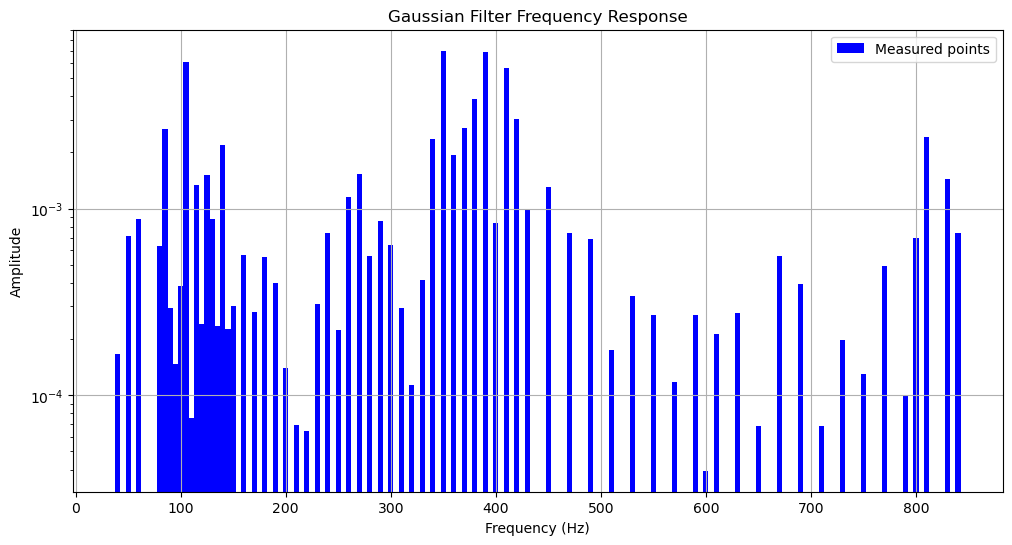


频率响应数据:
    target_freq  measured_freq  amplitude
0            40      39.693827   0.000166
1            50      50.039656   0.000715
2            60      59.782554   0.000879
3            80      79.893566   0.000633
4            85      84.906197   0.002671
..          ...            ...        ...
64          790     789.916643   0.000100
65          800     800.417080   0.000696
66          810     810.261867   0.002434
67          830     829.948888   0.001438
68          840     840.154118   0.000736

[69 rows x 3 columns]
